<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/1_WayANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Config display
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-deep') #Plot style

In [3]:
# Import data
df = pd.read_csv(
    'https://raw.githubusercontent.com/naenumtou/dataScienceLab/main/datasets/carData.csv'
)

# Show table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29106 entries, 0 to 29105
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             29106 non-null  object 
 1   usedType          29106 non-null  object 
 2   downPercent       29096 non-null  float64
 3   modelDescription  29106 non-null  object 
 4   color             29106 non-null  object 
 5   condition         29106 non-null  object 
 6   km                29101 non-null  float64
 7   modelGroup        29106 non-null  object 
 8   wheel             29106 non-null  object 
 9   gear              29106 non-null  object 
 10  door              29106 non-null  int64  
 11  engine            29106 non-null  float64
 12  fuel              29106 non-null  object 
 13  age               29106 non-null  float64
 14  rv                29106 non-null  float64
 15  rvRedBook         29106 non-null  float64
dtypes: float64(6), int64(1), object(9)
memor

In [4]:
# Define plot function
def plotRV(group):
  mean = df.groupby(
      [group],
      as_index = False
  )['rv'].mean()
  plt.figure(figsize = (20, 6))
  plt.title(f'Residual value by {group}')
  sns.stripplot(
      x = group,
      y = 'rv',
      data = df,
      palette = 'mako',
      zorder = 1
  )
  sns.pointplot(
      x = group,
      y = 'rv',
      data = mean,
      join = False,
      color = 'red',
      zorder = 100
  )
  plt.gca().set_yticklabels([f'{y * 100:.2f}%' for y in plt.gca().get_yticks()])
  return plt.show()

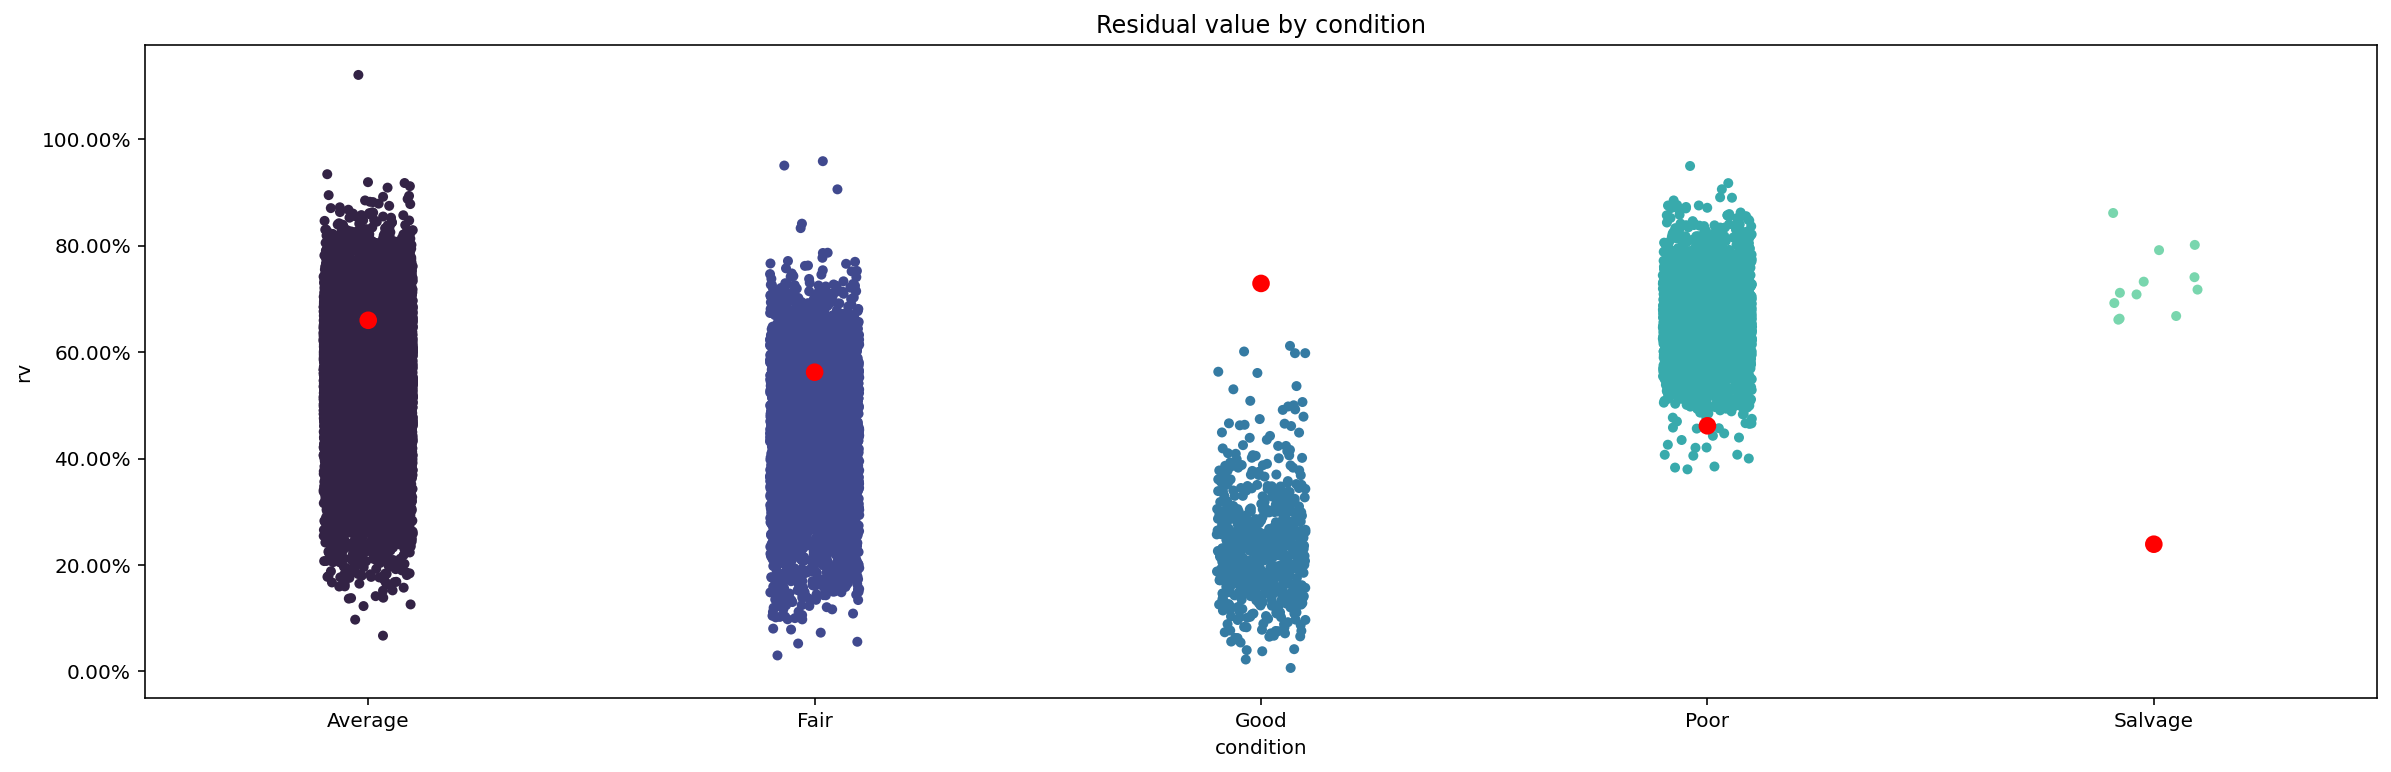

In [5]:
# Plot by condition
plotRV('condition')

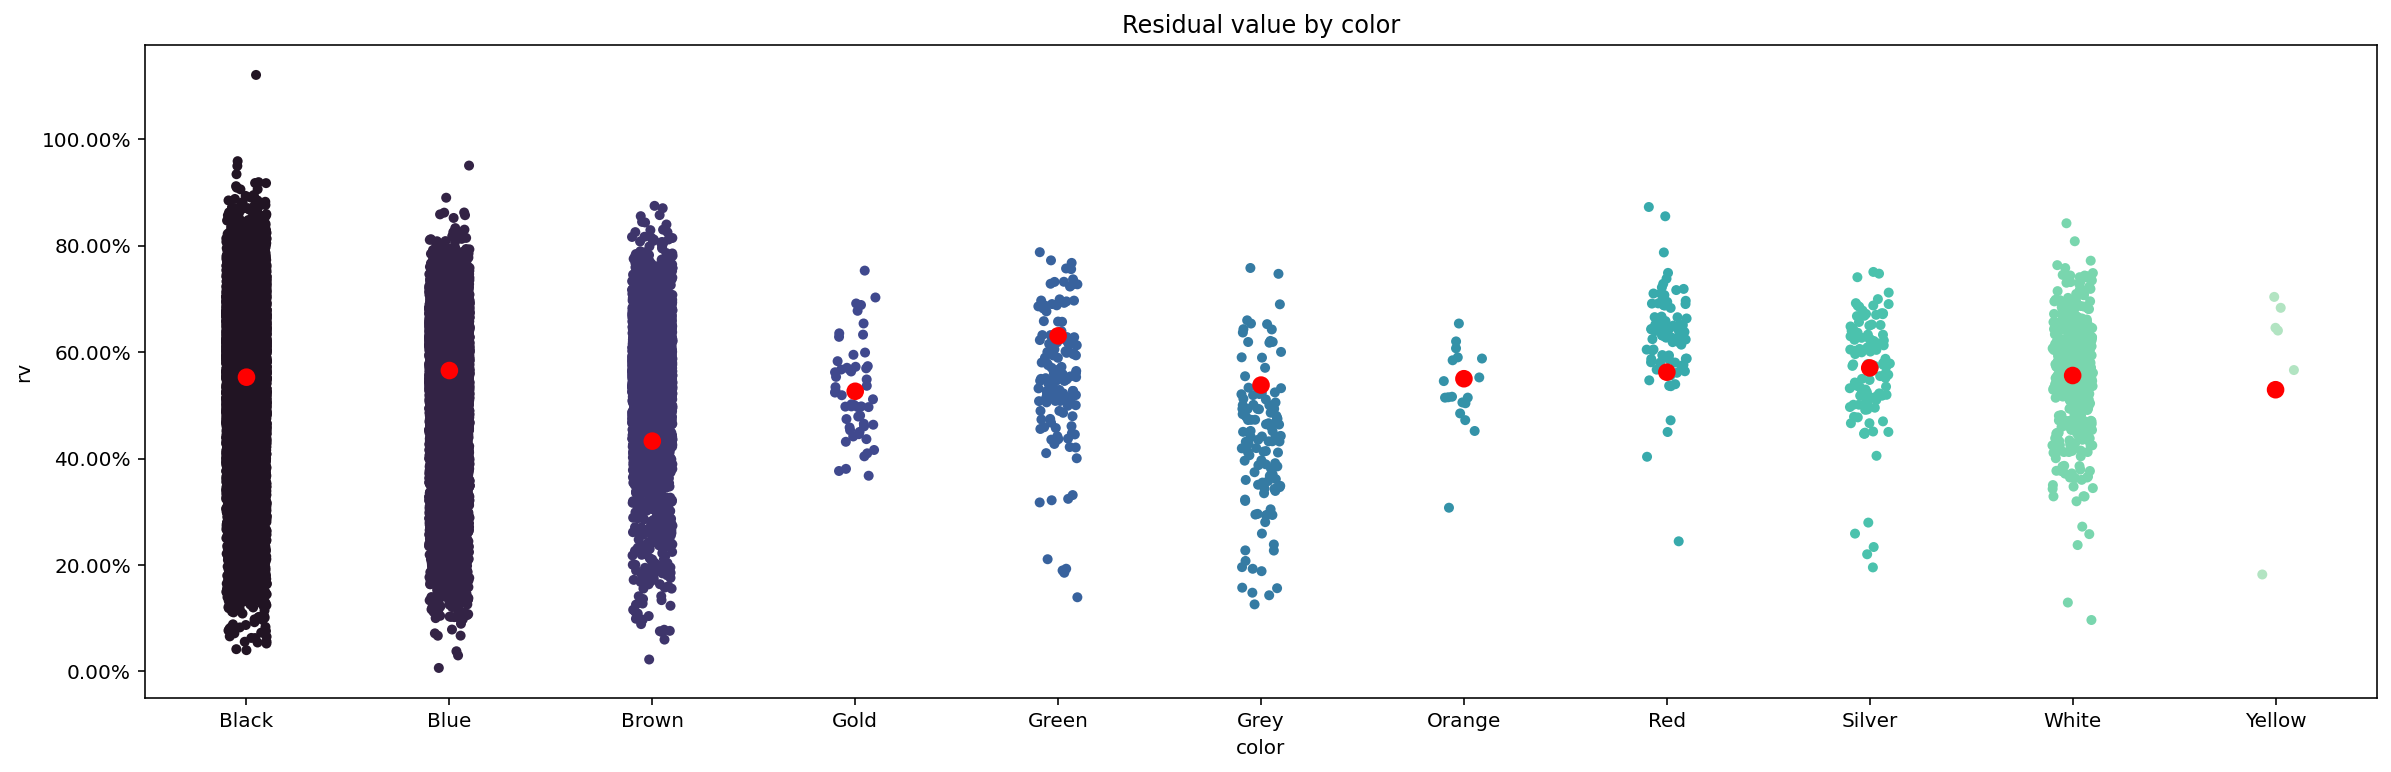

In [6]:
# Plot by color
plotRV('color')

In [7]:
# Define function for 1-Way ANOVA testing
def OneWayANOVA(group):
  formula = f'rv ~ C({group})'
  anova = smf.ols(
      formula = formula,
      data = df
  ).fit()
  return sm.stats.anova_lm(anova)

## Hypothesis testing

$$H_0: \mu_{a1} = \mu_{a2} = \mu_{a3}$$
$$H_1: \text{not all means are equal}$$

- If p-value less than 0.05 the null hypothesis can be rejected. This means some pairs of categorical features having different mean.
- If p-value greater than 0.05 the null hypothesis cannot be rejected. This means all categorical features having the same mean.

In [8]:
# Testing for condition
OneWayANOVA('condition')

,df,sum_sq,mean_sq,F,PR(>F)
C(condition),4.0,145.335358,36.333840,3063.742425,0.0
Residual,29101.0,345.117480,0.011859,NaN,NaN


In [9]:
# Testing for color
OneWayANOVA('color')

,df,sum_sq,mean_sq,F,PR(>F)
C(color),10.0,4.122453,0.412245,24.662816,4.516041e-47
Residual,29095.0,486.330385,0.016715,NaN,NaN


In [10]:
# Define function for Tukey Honest Significant Differences (TukeyHSD)
def Tukey(group):
  return print(pairwise_tukeyhsd(df['rv'], df[group]))

In [11]:
# Testing for condition
Tukey('condition')

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Average    Fair  -0.0976 0.001  -0.103 -0.0922   True
Average    Good   0.0692  0.18 -0.0167  0.1551  False
Average    Poor  -0.1983 0.001 -0.2048 -0.1917   True
Average Salvage  -0.4207 0.001 -0.4336 -0.4078   True
   Fair    Good   0.1668 0.001   0.081  0.2526   True
   Fair    Poor  -0.1007 0.001 -0.1054  -0.096   True
   Fair Salvage  -0.3231 0.001 -0.3352  -0.311   True
   Good    Poor  -0.2675 0.001 -0.3534 -0.1816   True
   Good Salvage  -0.4899 0.001 -0.5765 -0.4033   True
   Poor Salvage  -0.2224 0.001  -0.235 -0.2098   True
-----------------------------------------------------


In [12]:
# Testing for model group
Tukey('color')

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Black   Blue   0.0125    0.9 -0.0289  0.0539  False
 Black  Brown  -0.1201  0.001 -0.1591 -0.0812   True
 Black   Gold  -0.0265    0.9 -0.0835  0.0306  False
 Black  Green   0.0776  0.001  0.0314  0.1238   True
 Black   Grey  -0.0148  0.001 -0.0232 -0.0065   True
 Black Orange  -0.0029    0.9 -0.0394  0.0336  False
 Black    Red   0.0094    0.9 -0.0122  0.0311  False
 Black Silver   0.0174    0.9 -0.1527  0.1874  False
 Black  White   0.0032    0.9 -0.0046  0.0109  False
 Black Yellow  -0.0236    0.9 -0.1219  0.0748  False
  Blue  Brown  -0.1326  0.001 -0.1886 -0.0766   True
  Blue   Gold   -0.039 0.7548 -0.1088  0.0308  False
  Blue  Green   0.0651 0.0262  0.0038  0.1264   True
  Blue   Grey  -0.0273 0.5394 -0.0684  0.0137  False
  Blue Orange  -0.0154    0.9 -0.0697  0.0389  False
  Blue    Red  -0.0031    0.9 -0.0487  0.0426 